# **Project #3: Reddit NLP - CVEC/RF Model
### DestinyTheGame vs. raidsecrets
*By Daniel Preston McBride*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import time

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
reddit = pd.read_csv('../data/reddit_data.csv')
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3838 non-null   int64 
 1   title      3838 non-null   object
 2   selftext   3838 non-null   object
dtypes: int64(1), object(2)
memory usage: 90.1+ KB


---
### Fitting X and y on train test split

In [3]:
X = reddit['selftext']
y = reddit['subreddit']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

---
### Creating pipeline with transformer and estimater.  Passing the pipeline with designated hyperparameters through gridsearchCV.  Utilized an appending DataFrame to compare adjustments to hyperparameters for each model ran.
*Referenced from 6.03-lesson-random-forest*

In [5]:
count = 0
model_params = {}

In [17]:
count = count
model_params = model_params

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

params = {
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2)],
    'cvec__max_features': [2500],
    'cvec__max_df': [0.8],
    'cvec__min_df': [5],
    'rf__n_estimators': [90],
    'rf__max_features': ['auto'],
    'rf__max_depth': [5],
    'rf__min_samples_leaf': [2],
    'rf__ccp_alpha': [0.001]
}

gs = GridSearchCV(estimator=pipe,
                 param_grid=params,
                 cv=5,
                 verbose=1)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['best_score'] = gs.best_score_
gs.best_params_['train_score'] = gs.score(X_train, y_train)
gs.best_params_['test_score'] = gs.score(X_test, y_test)
model_params[f'model_{count}'] = gs.best_params_

model_df = pd.DataFrame.from_dict(model_params, orient='index')
model_df

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,cvec__max_df,cvec__max_features,cvec__min_df,cvec__ngram_range,cvec__stop_words,rf__ccp_alpha,rf__max_depth,rf__max_features,rf__min_samples_leaf,rf__n_estimators,best_score,train_score,test_score
model_1,0.85,2250,5,"(1, 2)",english,0.001,5,auto,3,88,0.777359,0.783693,0.760417
model_2,0.85,2500,5,"(1, 2)",english,0.001,5,auto,5,88,0.777733,0.786299,0.765625
model_3,0.85,2500,5,"(1, 2)",english,0.001,5,auto,5,90,0.775500,0.788533,0.765625
model_4,0.90,2500,5,"(1, 2)",english,0.001,5,auto,5,90,0.776246,0.780715,0.755208
model_5,0.85,2500,5,"(1, 2)",english,0.001,5,auto,3,88,0.775874,0.775875,0.758681
model_6,0.80,2500,5,"(1, 2)",english,0.001,5,auto,3,90,0.773641,0.781459,0.765625
model_7,0.80,2500,5,"(1, 2)",english,0.001,5,auto,3,90,0.770290,0.769918,0.754340
model_8,0.80,2500,5,"(1, 1)",english,0.001,5,auto,1,90,0.780342,0.781832,0.747396
model_9,0.80,2500,5,"(1, 2)",english,0.001,5,auto,2,90,0.771783,0.782949,0.761285


In [19]:
gs.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 2500,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'rf__ccp_alpha': 0.001,
 'rf__max_depth': 5,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 90,
 'best_score': 0.7717825174970405,
 'train_score': 0.7829486224869695,
 'test_score': 0.7612847222222222}

---
### Checking scores against the baseline score; Visualizing probability metrics with confusion matrix

In [7]:
y.value_counts(normalize=True)

1    0.505732
0    0.494268
Name: subreddit, dtype: float64

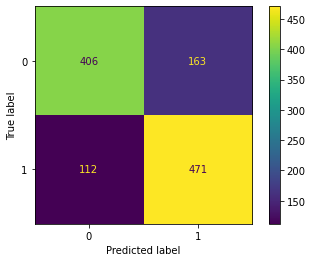

In [18]:
plot_confusion_matrix(gs, X_test, y_test);